# Week 8 - Classification



In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Outline:
* Classification problems in machine learning
* Overview of classification methods
* Implementing basic classification methods with and without sklearn
* Evaluating performace of classification
* Cross-Validation techniques

## 1. Classification problems in machine learning

In general, a learning problem considers a set of __n samples__ of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or __features__.

In case of classification the property we are trying to learn and predict is __class label__ of a sample.

### Types of classification problems

In classification problems we distinguish:
* binary classification (predicting one of the two classes)
* multiclass or multivariate classification (predicting one of more than two classes)
* multilabel classification (predicting several class labels out of more than two classes)



###  Classification vs Regression

Regression and classification methods are related. For intance, Logistic Regression is a classification method. However, in case of classification, predicted dependent variable is categorical, denoting a class.


### Classification vs Clustering
In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters. Usually, the number of categories (clusters) is also unknown.


Supervised Learning (Regression, __Classification__):
    - labeled data, where class is known

Unsupervised Learning (Clustering):
    - unlabeled data, where class is unknown
    - the number of classes could be unknown

Semi-supervised Learning:
    - small amounts of labeled data, where class is known
    - large amounts of unlabeled data


### A simple one-dimensional problem

The task is to classify pixels in an image as object and background classes (binary).
Pixel intensity is our only parameter (1D).
We calculate a histogram of pixel intensities and introduce a threshold separating object from background.

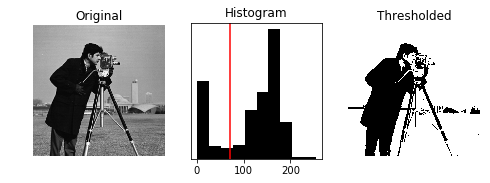

In [4]:
from skimage.data import camera

image = camera()
thresh = 70
binary = image > thresh

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image.flatten(), color='k')
ax2.get_yaxis().set_visible(False)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

### Digits dataset is an example of a classification problem

* We can consider classification of digits as a __multiclass classification__ or as __10 binary One-vs-All classification__ problems

* In case of __multilabel__ classification each image can be assigned more than one class, e.g. for a handwritten number with two digits (12) identify labels 1 and 2.



(1797, 64)
(1797,)
Digits are classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
For instance this 64 pixel image is assigned class label 3


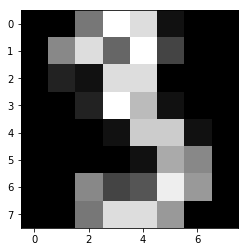

In [5]:
from sklearn import datasets 

digits = datasets.load_digits()

# X - how digits are handwritten
X = digits['data']
print(X.shape)

# y - what these digits actually are
y = digits['target']
print(y.shape)
print("Digits are classes:", set(y))

print("For instance this 64 pixel image is assigned class label", y[3])
plt.imshow(X[3].reshape((8,8)),  cmap=plt.cm.gray)
plt.show()

## 2. Overview of classification methods

Many of the method implement discriminative learning of linear classifiers under convex loss functions.

* Nearest Neighbors classifier
http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

* Logistic Regression
http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

* Linear and Quadratic Discriminant Analysis
http://scikit-learn.org/stable/modules/lda_qda.html

* Stochastic Gradient Descent http://scikit-learn.org/stable/modules/sgd.html#classification

* Support Vector Machines - SVM, SVC http://scikit-learn.org/stable/modules/svm.html#classification

* Neural networks:
    - Simplest example - Perceptron
    http://scikit-learn.org/stable/modules/linear_model.html#perceptron

* Decision tree
http://scikit-learn.org/stable/modules/tree.html#classification

* Ensembl methods:
 - like Gradient Tree Boosting   http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
 -  and Voting:
http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier
 - and RandomForest
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* Naive Bayes classifier
http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

* Gaussian process classifier (for time series)
http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc


## 3. Implementing basic classification methods with and without sklearn

## Logistic Regression

$$z = \beta_0 + \beta_1* x_1 + \beta_2*x_2 ... $$

$$p = \frac{1}{1 + e^{-z}} $$

Based on https://visualstudiomagazine.com/Articles/2018/01/04/logistic-regression.aspx?Page=1

In [8]:
X = np.array([ # array of info about males and females
    [1.5, 2.5],
    [3.5, 4.5],
    [6.5, 6.5],
    [4.5, 1.5],
    [5.5, 3.5],
    [7.5, 3.5]])
y = np.array([1,1,1,0,0,0])

# logistic regresion training
W = np.random.uniform(low = -0.01, high=0.01, size=2) # pick random weights to start with
b = np.random.uniform(low = -0.01, high=0.01)

alpha = 0.01 # learning rate
indices = np.arange(X.shape[0])

for _ in range(10000):
    i = np.random.randint(low=0, high=X.shape[0])
    z = np.dot(X[i,], W) + b
    p = 1.0 / (1.0 + np.exp(-z))

    # update all weights
    # gradient ascent log likelihood
    W += alpha * X[i,] * (y[i] - p)
    b += alpha * (y[i] - p)
        
    if not _ % 100:
        z = np.dot(X, W) + b
        p = 1.0 / (1.0 + np.exp(-z))
        err = np.sum(y - p)**2
        print(_, err)
        if err < 0.0001:
            break

print("\nModel coefficients")
print("W", W, "\nb", b)

z = np.dot(X, W) + b
p = 1.0 / (1.0 + np.exp(-z))
print("\nOriginal labels ", y)
print("Predicted proba ", np.round(p, 2))
print("Predicted labels", np.round(p).astype(int))

0 0.04892663509329542
100 0.013645015230095444
200 0.05716411369774425
300 0.04310921662726523
400 0.001274078774861368
500 0.0009386043428574028
600 0.06485755843480741
700 0.011748525815031392
800 0.0020141074841333994
900 0.0005287669558204819
1000 0.01729524400748299
1100 2.4741069864441876e-07

Model coefficients
W [-1.35611892  1.69655418] 
b 0.0689425472237335

Original labels  [1 1 1 0 0 0]
Predicted proba  [0.91 0.95 0.91 0.03 0.19 0.02]
Predicted labels [1 1 1 0 0 0]


In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)
print(y)
print(lr.predict(X))
#print(lr.predict_proba(X))

[[-0.76401983  0.96421555]]
[0.04405217]
[1 1 1 0 0 0]
[1 1 1 0 0 0]


### Perceptron



In [10]:
class Perceptron(object):
    """Perceptron classifier.
    From https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch02/ch02.ipynb

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # initial training weight
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
ppn = Perceptron()
ppn.fit(X, 2*y-1) # requires labels -1, 1  not  0 and 1
ppn.predict(X)

array([ 1,  1,  1, -1, -1, -1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[-1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


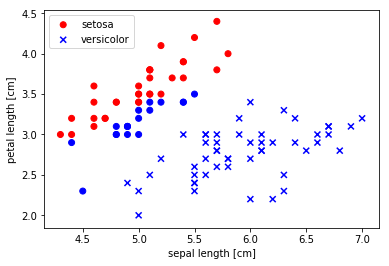

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
y = iris.target
# select setosa and versicolor
# extract sepal length and petal length
X = iris.data[y < 2, :2]
y = y[y<2]


ppn = Perceptron(eta=0.1, n_iter=100)
ppn.fit(X, y)
print(y)
pred_y = ppn.predict(X)
print(pred_y)

# plot data
colors = np.where(pred_y < 0.0, 'red', 'blue')
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color=colors[y == 0], marker='o', label='setosa')

plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color= colors[y==1], marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## Nearest Neighbor classifier

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


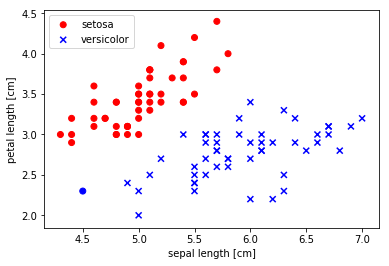

In [13]:
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
y = iris.target
# select setosa and versicolor
# extract sepal length and petal length
X = iris.data[y < 2, :2]
y = y[y<2]


clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X, y)
print(y)
pred_y = clf.predict(X)
print(pred_y)

# plot data
colors = np.where(pred_y == 0.0, 'red', 'blue')
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color=colors[y == 0], marker='o', label='setosa')

plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color= colors[y==1], marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## Evaluating performace of classifiers

### Comparing predicted class labels to actual class labels

Consider two classes 0 and 1. For a given test dataset we obtain a vector of predicted class labels and compare it to the vector of actual class labels.

For instance,

Actual:    [0, 1, 1, 0]

Predicted: [0, 0, 1, 1]

For class 0: [TP, FP, TN, FN]

For class 1: [TN, FN, TP, FP]

* TP - True Positive 
* TN - True Negative 
* FP - False Positive (Type I error in statistics)
* FN - False Negative (Type II error in statistics)

Although classes 0 and 1 look interchangeable, the interpretation of the results very much depends on the meaning of each class for your domain-specific problem. For instance, consider a hypotetical test where class 1 means disease and class 0 means healthy and interpret TP, TN, FP, FN.

#### Confusion matrix

Confusion matrix describes a binary classifier.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


<table>
			<tbody><tr>
				<td colspan="2" rowspan="2"></td>
				<td colspan="2">Predicted</td>			
			</tr>
			<tr>
				<td>Negative</td>
				<td>Positive</td>
			</tr>
			<tr>
				<td rowspan="2">Actual</td>
				<td>Negative</td>
				<td><b>TN</b></td>
				<td><b>FP</b></td>
			</tr>
			<tr>
				<td>Positive</td>
				<td><b>FN</b></td>
				<td><b>TP</b></td>
			</tr>
		</tbody>
</table>

considering Class 0 = Negative and Class 1 = Positive  in our trivial case it will become:

<table>
			<tbody><tr>
				<td colspan="2" rowspan="2"></td>
				<td colspan="2">Predicted</td>			
			</tr>
			<tr>
				<td>Class 0</td>
				<td>Class 1</td>
			</tr>
			<tr>
				<td rowspan="2">Actual</td>
				<td>Class 0</td>
				<td><b>2453</b></td>
				<td><b>0</b></td>
			</tr>
			<tr>
				<td>Class 1</td>
				<td><b>0</b></td>
				<td><b>1234</b></td>
			</tr>
		</tbody>
</table>

From confusion matrix we can calculate a number of useful metrics:

* [Model evaluation in Scikit Learn](http://scikit-learn.org/stable/modules/model_evaluation.html)

* [Classification metrics in Scikit Learn](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

* [Imbalanced classification package](http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/evaluation/plot_classification_report.html#sphx-glr-auto-examples-evaluation-plot-classification-report-py)

#### Accuracy
$$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$$
How often is the classifier correct?

* [Accuracy score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

* Accuracy for binary classifiers is [Jaccard Similarity(http://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_similarity_score.html#sklearn.metrics.jaccard_similarity_score)


#### Error rate (Misclassification rate)
$$ Error = 1 - Accuracy = \frac{FP+FN}{TP+FP+FN+TN} $$
How often is the classifier wrong?

#### True positive rate, also Sensitivity or Recall
Out of all actual positive cases, how many do we predict as positive?
$$ Sensitivity = \frac{TP}{TP + FN} $$

#### False positive rate
Out of all actual negative cases, how many are predicted as positive?
$$ FPR = \frac{FP}{TN + FP} $$

#### Specificity 
Out of all actual negative cases, how many are predicted as negative?
$$ FPR = 1-FRP = \frac{TN}{TN + FP} $$

#### Precision (Positive predictive value)
Out of all predicted positive, how many are actually positive?
$$Precision = \frac{TP}{TP + FP}$$

#### Prevalence
Fraction of actually positive cases in the dataset? Shows if there is any imbalance between positive and negative cases.
$$Prevalence = \frac{TP + FN}{TP+FP+FN+TN}$$

#### Positive Predictive Value

Positive Predictive Value [PPV](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values) is similar to precision but takes into account imbalance of the dataset:

$$PPV = \frac{Sensitivity * Prevalence}{Sensitivity * Prevalence + (1 - Specificity) * (1 - Prevalence)}$$

#### False Discovery Rate

Sometimes False Discovery Rate -- a complement of Positive Predictive Value is reported:
$$ FDR = 1 - PPV $$


#### Prediction baseline

**Null Error Rate** is a baseline metric that shows how often a classifier would be wrong if it always predicted the class with highest prevalence (be it Positive or Negative).

For instance, if positive class is prevalent:

$$ Null = \frac{FP}{FP + TP} $$

Or in case of majority of negative cases:

$$ Null = \frac{FN}{FN + TN} $$


**Cohen's kappa** statistic calculates agreement between annotators [see more](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html)
In principle it can be used to compare observed accuracy (of a given classifier) to expected accuracy (random chance classifier). [see example with explanations](http://epiville.ccnmtl.columbia.edu/popup/how_to_calculate_kappa.html)


#### F score ($F_1$ score, F-measure)

F score is a combination of precision and recall:

$$F_1 = \frac{2TP}{2TP + FP + FN}$$

## Performance over all possible thresholds

ROC Curve: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. (More details about ROC Curves.)



#### Receiver operating characteristic curve (ROC curve)

ROC curve illustrates the performance of a binary classifier system as its *discrimination threshold* is varied by plotting True Positive rate vs False Positive rate. It can also be referred to as a Sensitivity vs (1-Specificity) plot.

In order to make the plot you need to obtain a list of scores for each classified data point. They can be typically obtained with **.predict_proba()** or in some cases with **.decision_function()**.

* https://en.wikipedia.org/wiki/Receiver_operating_characteristic
* http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Area under ROC curve [AUC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) is a quantitative characteristic of a binary classifier.

In a cross-validataion setting mean and variance of ROC AUC are useful measures of classifier robustness [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

#### Precision-Recall curve

In some cases Precision and Recall plots are used for characterizing classifier performance as its *discrimination threshold* is varied.

* http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

As in the case of ROC, are under Precision-Recall curve can be calculated.

In [14]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# digits dataset
digits = datasets.load_digits()
X = digits['data']
y = digits['target']

# Binarize the output
y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = y_bin.shape[1]
# now we have one binary column for each class instead of one column with many class names

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

precision = {}
recall = {}
pr_auc = {}

# we calculate 10 curves, one for each class
for i in range(n_classes):
    # ROC:
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Precision-recall:
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    pr_auc[i] = average_precision_score(y_test[:, i], y_score[:, i])

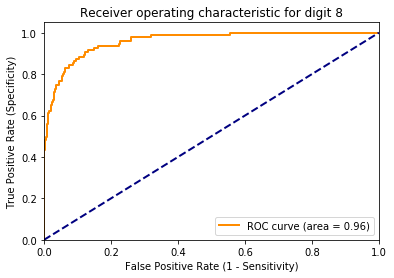

In [15]:
# Plot only one ROC curve for selected class
plt.figure()
lw = 2
digit = 8
plt.plot(fpr[digit], tpr[digit], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[digit])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic for digit ' + str(digit))
plt.legend(loc="lower right")
plt.show()

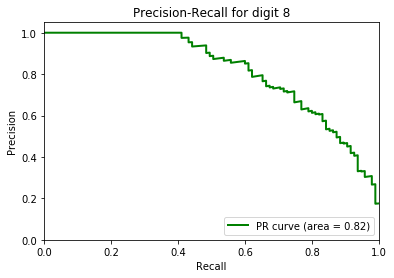

In [16]:
# Plot only one Precision-Recall curve for selected class
plt.figure()
lw = 2
digit = 8
plt.plot(recall[digit], precision[digit], color='green',
         lw=lw, label='PR curve (area = %0.2f)' % pr_auc[digit])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for digit ' + str(digit))
plt.legend(loc="lower right")
plt.show()

### Classification Report



In [18]:
from sklearn.metrics import classification_report

# digits dataset
digits = datasets.load_digits()
X = digits['data']
y = digits['target']

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

# print(y_test[0:10])
# print(y_predicted[0:10])
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        95
          1       0.95      0.93      0.94        98
          2       0.95      0.98      0.97        85
          3       0.93      0.93      0.93       100
          4       0.95      0.94      0.94        81
          5       0.96      0.97      0.96        90
          6       0.94      0.99      0.96        92
          7       0.93      0.96      0.95        82
          8       0.85      0.77      0.81        83
          9       0.92      0.90      0.91        93

avg / total       0.94      0.94      0.94       899



## 5. Cross-Validation techniques

In [38]:
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X = digits['data']
y = digits['target']

y = np.where(y == 1, 1, 0)

def cross_validation_scores(clf, scoring_function, N=100):
    for i in range(N):
        # SPLIT INTO TRAIN & TEST
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        # TRAINING with train data slice
        clf.fit(X_train, y_train)

        # PREDICT for testing slice:
        y_predicted = clf.predict(X_test)

        # EVALUATE performance
        yield round(scoring_function(y_test, y_predicted), 2)

/Users/agoncear/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


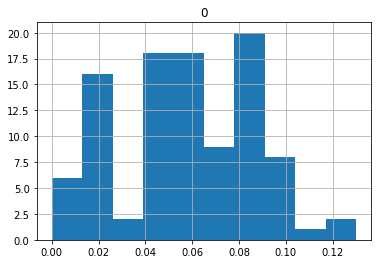

In [41]:
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.svm import SVC

# from sklearn.neural_network import MLPClassifier
# >>> clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
# ...                     hidden_layer_sizes=(5, 2), random_state=1)


clf = SVC()
errors = cross_validation_scores(clf, f1_score)
pd.DataFrame(errors).hist()
plt.show()

In [21]:
# GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

split = np.random.random(y.shape) > 0.3
X_train_test = X[split]
y_train_test = y[split]
X_validation = X[np.logical_not(split)]
y_validation = y[np.logical_not(split)]
print("TRAIN & TEST", X_train_test.shape)
print("VALIDATION", X_validation.shape)

knn = KNeighborsRegressor(n_neighbors=1)

parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
g = GridSearchCV(knn, parameters, cv=10)

# Use Train_Test dataset. Grid Search will use cross-validation to split it into Train and Test subsets
g.fit(X_train_test, y_train_test)
best = g.best_params_
cv = g.cv_results_

print('GridSearch found optimal number of neighbors:', best['n_neighbors'])
print('Mean CV test scores are:', cv['mean_test_score'])

knn = KNeighborsRegressor(n_neighbors = best['n_neighbors']) 
knn.fit(X_train_test, y_train_test)

# Use VALIDATION dataset
print('The MSE for the model is:', mean_squared_error(y_validation, knn.predict(X_validation)))


"""
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
"""

TRAIN & TEST (1270, 64)
VALIDATION (527, 64)


In [44]:
### In class exercises

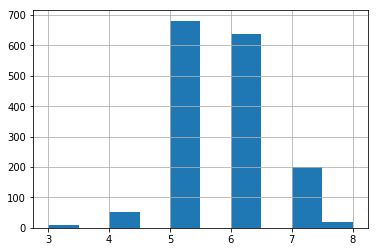

In [45]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wines = pd.read_csv(url, sep=";")
wines["quality"].hist()

1. Apply multinomial naive bayes

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB


3. Create a column quality_class defined as high: 1 (>=7) and low: 0 quality <7
Apply logistic regression to predict it

Add cross validation

Homework assignments will be posted!